# Simulating TF distance-dependent activation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## TF distance-dependent activation

Proposition for synthetic activation value:
- if(dist<=200) score=log2(200-dist)
- else score=log2(dist-200)
- if(score>log2(200)) score=log2(200)

Note that originally the cap statement said _if(score>200) score=200_. We're assuming here that the above is what was intended. We also cap the minimum activation value at 0 (i.e., log2(1)).

We might also want to not use log scale, so we leave it changeable, and we also allow for an offset to shift the function vertically.

In [2]:
def activation_score(dist, peak_dist=200, score_ceiling=200, offset=0, log_scale=False):
    score = np.fmin(np.abs(peak_dist - dist), score_ceiling)
    if log_scale:
        score = np.log2(np.fmax(score, 1))
        if offset != 0:
            offset = np.log2(np.abs(offset)) * np.sign(offset)
    return score + offset

In [3]:
dists = np.arange(0,450,1)
scores = activation_score(dists)

Text(0.5, 0.98, 'Activation score')

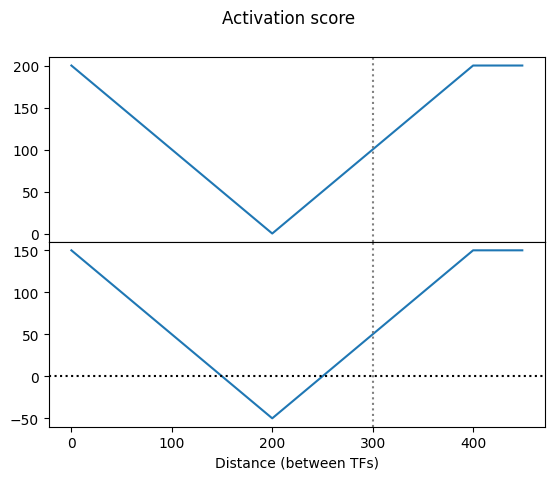

In [11]:
fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)
axs[0].plot(dists, scores)
axs[0].axvline(300, color='grey', linestyle='dotted')
axs[1].plot(dists, activation_score(dists, offset=-50))
axs[1].set_xlabel("Distance (between TFs)")
axs[1].axhline(0, color='black', linestyle='dotted')
axs[1].axvline(300, color='grey', linestyle='dotted')
fig.suptitle("Activation score")

In [5]:
def standardize(x):
    m = np.mean(x)
    n = np.std(x)
    return (x-m)/n

Text(0, 0.5, 'Activation score')

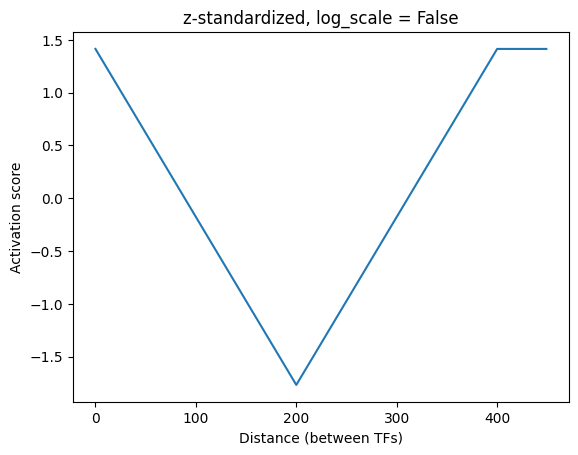

In [6]:
plt.plot(dists, standardize(scores))
plt.title("z-standardized, log_scale = False")
plt.xlabel("Distance (between TFs)")
plt.ylabel("Activation score")

In contrast, on the log scale:

Text(0.5, 0.98, 'Activation score')

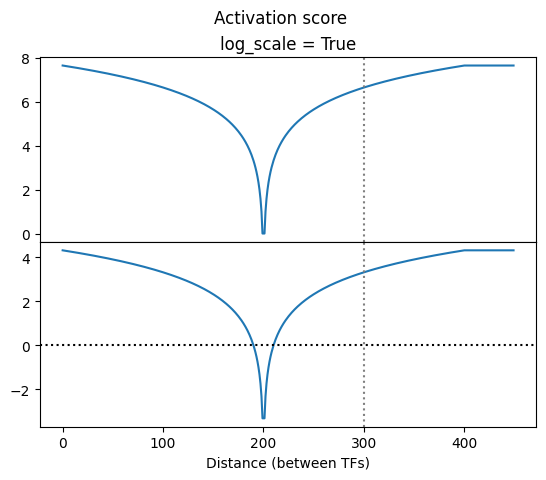

In [12]:
fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)
axs[0].plot(dists, activation_score(dists, log_scale=True))
axs[0].set_title("log_scale = True")
axs[0].axvline(300, color='grey', linestyle='dotted')
axs[1].plot(dists, activation_score(dists, log_scale=True, offset=-10))
axs[1].set_xlabel("Distance (between TFs)")
axs[1].axhline(0, color='black', linestyle='dotted')
axs[1].axvline(300, color='grey', linestyle='dotted')
fig.suptitle("Activation score")
